# This notebook evaluates different methods for aggrerating mutiple RSSI readings in order to get a better distance estimation

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def parse_data_file(f):
    for line in f:
        tokens = line.strip().split()
        if tokens[0] == 'Starting' or tokens[0] == 'Stopping':
            continue
        mac, rssi, time = tokens
        mac = mac.strip(',')
        rssi = int(rssi)
        time = datetime.datetime.strptime(time, '%H:%M:%S.%f').time()
        
        yield (time, mac, rssi)

        
def read_experiment_files():
    distances = [2, 4, 6, 8, 10]
    for d in distances:
        with open('../data/rssi_distance/expt8/expt_07_29_{}f.dat'.format(d)) as f:
            df = pd.DataFrame(parse_data_file(f), columns=['datetime', 'mac_address', 'rssi'])
            df['ft'] = d
            yield df

            
df = pd.concat(read_experiment_files())
df.sort_values(['ft', 'datetime', 'mac_address'], inplace=True)

In [6]:
def logmean(x):
    return np.log(np.exp(x).mean())

In [7]:
window_size = 5

## Using regular mean

         mean       std
ft                     
2  -53.626008  1.290816
4  -60.198738  2.525830
6  -62.032102  2.579088
8  -65.167541  1.075850
10 -62.998698  1.459062


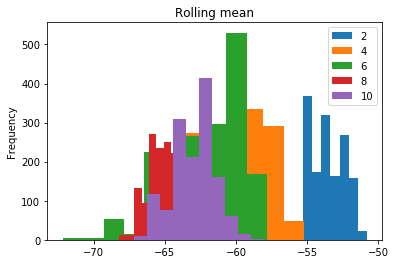

In [8]:
rmean = df.groupby(['mac_address', 'ft'])['rssi'].rolling(window_size).mean()
print(rmean.groupby('ft').agg(['mean', 'std']))

rmean.groupby('ft').plot.hist(legend=True, title='Rolling mean')
# plt.savefig('../rolling_mean.png', bbox_inches='tight')
plt.show()

## Using max

         mean       std
ft                     
2  -51.420026  0.653634
4  -54.794530  1.143954
6  -58.514234  1.237401
8  -63.083564  0.578878
10 -59.796671  1.288805


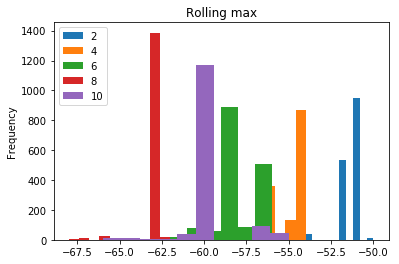

In [12]:
rmean = df.groupby(['mac_address', 'ft'])['rssi'].rolling(window_size).max()
print(rmean.groupby('ft').agg(['mean', 'std']))

rmean.groupby('ft').plot.hist(legend=True, title='Rolling max')
plt.savefig('../rolling_max.png', bbox_inches='tight')
plt.show()

## Using logmean

         mean       std
ft                     
2  -52.281515  0.833779
4  -55.892575  1.167830
6  -59.484377  1.256816
8  -63.945331  0.697292
10 -60.874639  1.278504


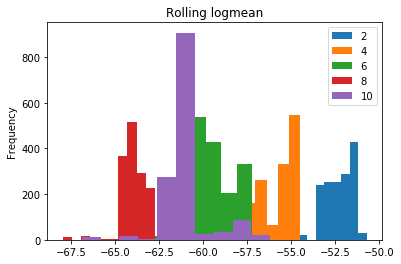

In [10]:
rmean = df.groupby(['mac_address', 'ft'])['rssi'].rolling(window_size).agg(logmean)
print(rmean.groupby('ft').agg(['mean', 'std']))

rmean.groupby('ft').plot.hist(legend=True, title='Rolling logmean')
plt.savefig('../rolling_logmean.png', bbox_inches='tight')
plt.show()

In [14]:
## Rolling logmean, after rolling mean (to see if logmean could improve even with the current firmware)

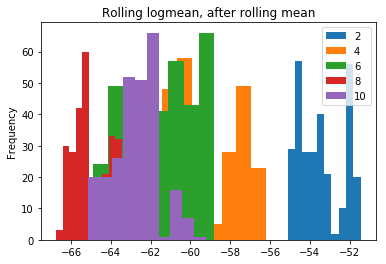

In [15]:
rmean = df.groupby(['mac_address', 'ft'])['rssi'].rolling(window_size).mean()

# Rolling logmean, after rolling mean (to see if logmean could improve even with the current firmware)
rmean = rmean.iloc[0::window_size]
rmean = rmean.groupby(['mac_address', 'ft']).rolling(5).agg(logmean)

rmean.groupby('ft').plot.hist(legend=True, title='Rolling logmean, after rolling mean')
plt.show()